<h1> <b> Análisis del Dataset Netflix Movies and TV Shows </b> </h1>

In [1]:
print("Dataset obtenido de https://www.kaggle.com/shivamb/netflix-shows")

Dataset obtenido de https://www.kaggle.com/shivamb/netflix-shows


<h2> <b> 1. Importación de Librerías </b> </h2>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2> <b> 2. Importación de Datos </b> </h2>

In [31]:
#Cargamos los datos.
ruta = "C:/Users/Usuario/Downloads/netflix_titles.csv"
datos = pd.read_csv(ruta)
datos.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


<h2> <b> 3. Pre-Procesamiento de Datos </b> </h2>

In [4]:
#Obtenemos información del dataset.
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [32]:
#Verificamos la cantidad de valores faltantes por columna, en términos porcentuales.
print("Cantidad de Valores Faltantes por Columna (%)")
print((datos.isnull().sum() / len(datos)) * 100)

print("")

print('''Debido a la cantidad de valores faltantes en cietas columnas, se tendrá precaución uso de la columna director,
ya que, al no tener el 30% de los valores de esta columna, podría llegarse a resultados erróneos, y no es conveniente 
eliminar una cantidad tan grande de observaciones.
Por otro lado, las demás columnas con valores faltantes presentan porcentajes de valores faltantes menores al 10%. 
Aunque no es lo ideal, puede haber más flexibilidad en el uso de estas columnas.''')

Cantidad de Valores Faltantes por Columna (%)
show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

Debido a la cantidad de valores faltantes en cietas columnas, se tendrá precaución uso de la columna director,
ya que, al no tener el 30% de los valores de esta columna, podría llegarse a resultados erróneos, y no es conveniente 
eliminar una cantidad tan grande de observaciones.
Por otro lado, las demás columnas con valores faltantes presentan porcentajes de valores faltantes menores al 10%. 
Aunque no es lo ideal, puede haber más flexibilidad en el uso de estas columnas.


In [6]:
#Omitimos las columnas show_id y description.
datos = datos.drop(columns = ["show_id", "description"], axis = 1)
datos.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies"
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies"
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas


<h2> <b> 4. Análisis de Datos </b> </h2>

Análisis 1: Cantidad de Shows de TV y Películas por Rating


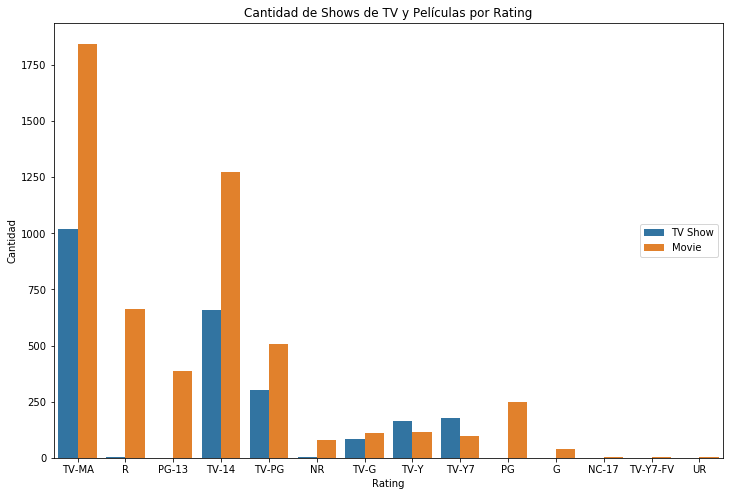

Observación del Análisis 1: Por lo general, hay más películas que shows de TV en casi todas las categorías.
La mayoría de series y películas se encuentran dentro de la categoría TV-MA, la cual apunta a público mayor de 17 años, 
por lo que podría considerarse que este es el mercado al que más atención se le presta en la actualidad.



In [7]:
print("Análisis 1: Cantidad de Shows de TV y Películas por Rating")

#Generamos una figura y un eje para el gráfico.
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

#Creamos un gráfico de conteo y añadimos las etiquetas de los ejes y una leyenda.
sns.countplot(x = "rating", data = datos, hue = "type")
ax.set_xlabel("Rating")
ax.set_ylabel("Cantidad")
ax.set_title("Cantidad de Shows de TV y Películas por Rating")
ax.legend(loc = "center right")

plt.show()

print('''Observación del Análisis 1: Por lo general, hay más películas que shows de TV en casi todas las categorías.
La mayoría de series y películas se encuentran dentro de la categoría TV-MA, la cual apunta a público mayor de 17 años, 
por lo que podría considerarse que este es el mercado al que más atención se le presta en la actualidad.''')
print("")

Análisis 2: Cantidad de Películas y Series Estrenadas por Año


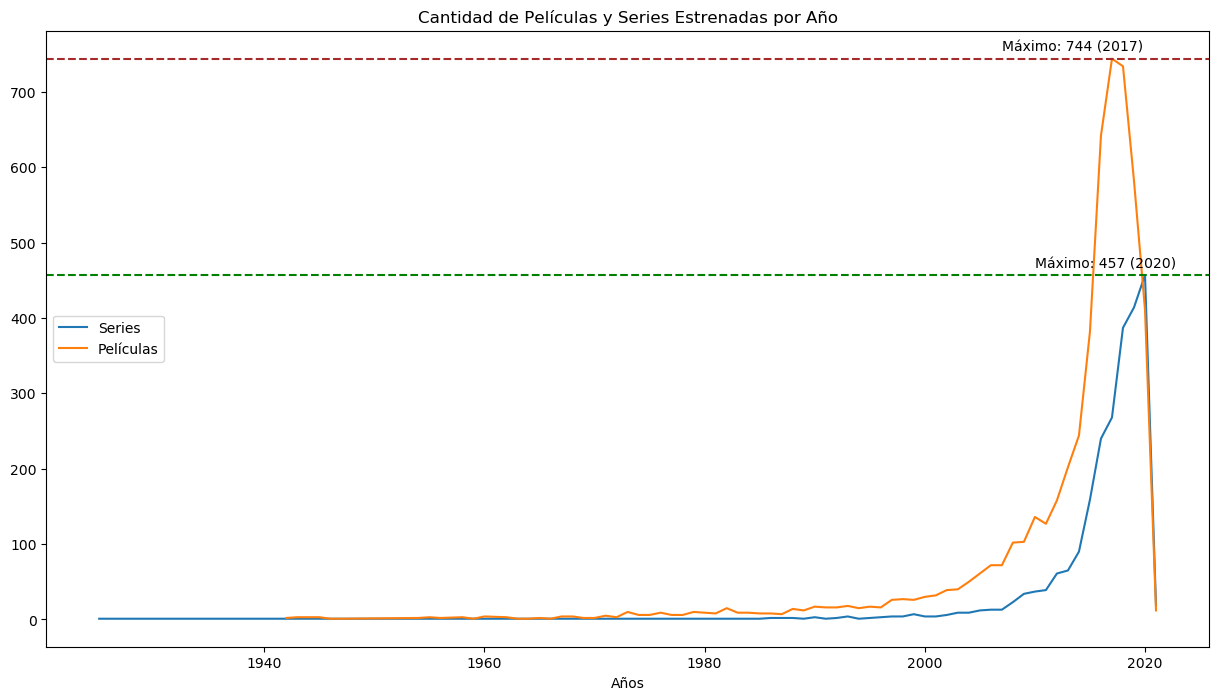

Observación del Análisis 2: La producción de series y películas ha incrementado drásticamente desde mediados 
del siglo XX hasta la actualidad, teniendo las películas el mayor volumen de producción y, por lo tanto, de estrenos. 
Sin embargo, el impacto de la pandemia del COVID-19 se hace evidente al final del gráfico, en donde puede apreciarse 
el desplome en estrenos tanto de películas como de series, debido a los paros en muchas producciones.



In [8]:
print("Análisis 2: Cantidad de Películas y Series Estrenadas por Año")

plt.style.use("default")

#Realizamos un conteo para cada tipo de medio, agrupados por el año de lanzamiento.
contador1 = pd.value_counts(datos.loc[datos["type"] == "TV Show","release_year"]).sort_index(ascending = True)
contador2 = pd.value_counts(datos.loc[datos["type"] == "Movie","release_year"]).sort_index(ascending = True)

#Generamos una figura y un eje para el gráfico.
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

#Creamos un gráfico de línea para cada contador y añadimos información adicional.
ax.plot(contador1, label = "Series")
ax.plot(contador2, label = "Películas")
ax.set_xlabel("Años")
ax.set_title("Cantidad de Películas y Series Estrenadas por Año")
ax.axhline(y = max(contador1), linestyle = "--", color = "green")
ax.annotate("Máximo: " + str(max(contador1)) + " (" + str(contador1[contador1 == max(contador1)].index[0]) + ")", 
            xy = [contador1[contador1 == max(contador1)].index[0] - 10, max(contador1) + 10])
ax.axhline(y = max(contador2), linestyle = "--", color = "brown")
ax.annotate("Máximo: " + str(max(contador2)) + " (" + str(contador2[contador2 == max(contador2)].index[0]) + ")", 
            xy = [contador2[contador2 == max(contador2)].index[0] - 10, max(contador2) + 10])
plt.legend()

plt.show()

print('''Observación del Análisis 2: La producción de series y películas ha incrementado drásticamente desde mediados 
del siglo XX hasta la actualidad, teniendo las películas el mayor volumen de producción y, por lo tanto, de estrenos. 
Sin embargo, el impacto de la pandemia del COVID-19 se hace evidente al final del gráfico, en donde puede apreciarse 
el desplome en estrenos tanto de películas como de series, debido a los paros en muchas producciones.''')
print("")

Análisis 3: Distribución del Número de Temporadas en Shows de TV


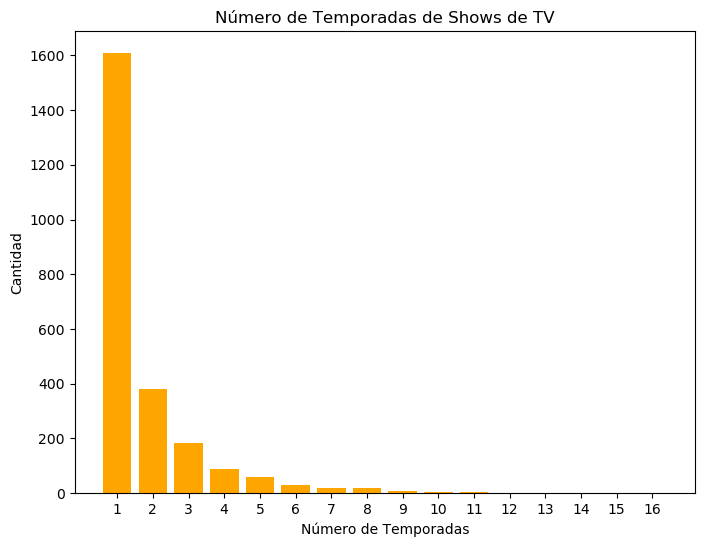

Observación del Análisis 3: La enorme mayoría de las series suelen tener una sola temporada actualmente. 
Esto puede deberse a tres posibles causas:
1) Algunas de estas series fueron recientemente producidas y estrenadas (como se evidenció en el Análisis 2) y por lo
tanto no ha transcurrido suficiente tiempo para que una "siguiente temporada" ocurra aún.
2) Algunas series no tuvieron la recepción esperada y se quedaron en una sola temporada, sin renovación.
3) Otras series podrían haber sido renovadas para una siguiente temporada, la cual está todavía en producción, lo cual 
llevaría a esperar lanzamientos aplazados debido al efecto de la pandemia.



In [10]:
print("Análisis 3: Distribución del Número de Temporadas en Shows de TV")

#Generamos una figura y un eje para el gráfico.
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

#Extraemos un subset con la duración de los shows de TV y lo procesamos.
subset1 = datos.loc[datos["type"] == "TV Show", ["duration"]]
subset1["duration"] = subset1["duration"].apply(lambda x: x.replace(" Seasons", ""))
subset1["duration"] = subset1["duration"].apply(lambda x: int(x.replace(" Season", "")))
subset1 = subset1.sort_values("duration", ascending = True)

#Creamos un contador de frecuencias por número de temporadas.
contador = pd.value_counts(subset1["duration"]).sort_index(ascending = True)

#Al parecer, no hay ningún show con 14 temporadas, por lo que inicialmente no se veía el valor en el eje x.
#Añadimos un registro más para compensar la falta del registro de 14 temporadas en el contador.
contador = contador.append(pd.Series([0], index = [14]))

#Creamos un gráfico de barras y añadimos etiquetas.
ax.bar(contador.index, contador.values, tick_label = contador.index, color = "orange")
ax.set_xlabel("Número de Temporadas")
ax.set_ylabel("Cantidad")
ax.set_title("Número de Temporadas de Shows de TV")

plt.show()

print('''Observación del Análisis 3: La enorme mayoría de las series suelen tener una sola temporada actualmente. 
Esto puede deberse a tres posibles causas:
1) Algunas de estas series fueron recientemente producidas y estrenadas (como se evidenció en el Análisis 2) y por lo
tanto no ha transcurrido suficiente tiempo para que una "siguiente temporada" ocurra aún.
2) Algunas series no tuvieron la recepción esperada y se quedaron en una sola temporada, sin renovación.
3) Otras series podrían haber sido renovadas para una siguiente temporada, la cual está todavía en producción, lo cual 
llevaría a esperar lanzamientos aplazados debido al efecto de la pandemia.''')
print("")

Análisis 4: Distribución de la Duración de las Películas


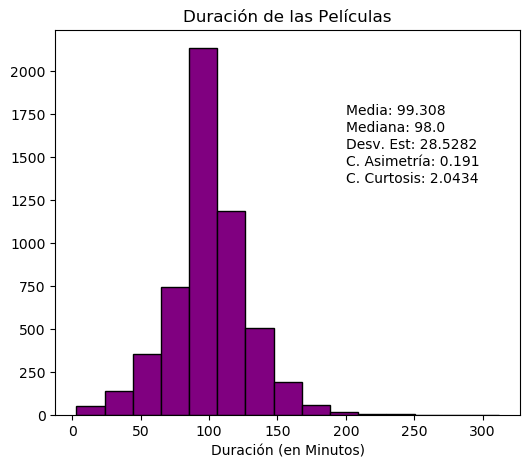

Observación del Análisis 4: La mayoría de películas parece tener una duración de alrededor de 100 minutos, es 
decir, cerca de dos horas. Curiosamente, hay una cierta cantidad de películas con duraciones por debajo de los 50
minutos; esto podría tratarse de cortos. Por otra parte, hay muy pocas películas que duren más de 200 minutos.
Podría decirse que el rango habitual de duración de películas a nivel histórico se sitúa entre una hora y dos horas y 
media.



In [25]:
print("Análisis 4: Distribución de la Duración de las Películas")

#Importamos las funciones skew y kurtosis de scipy.stats para calcular los coeficientes de asimetría y curtosis.
from scipy.stats import skew
from scipy.stats import kurtosis

#Extraemos un subset con la duración (en minutos) de cada película.
subset2 = datos.loc[datos["type"] == "Movie", ["duration"]]
subset2["duration"] = subset2["duration"].apply(lambda x: int(x.replace(" min", "")))

#Generamos una figura y un eje para el gráfico.
fig, ax = plt.subplots()
fig.set_size_inches(6, 5)

#Creamos un histograma de las duraciones de las películas, junto con algunos estadísticos de resumen.
ax.hist(subset2["duration"], bins = 15, color = "purple", ec = "black")
ax.set_xlabel("Duración (en Minutos)")
ax.set_title("Duración de las Películas")
ax.annotate("Media: {}".format(round(np.mean(subset2["duration"]), 4)), xy = [200, 1750])
ax.annotate("Mediana: {}".format(round(np.median(subset2["duration"]), 4)), xy = [200, 1650])
ax.annotate("Desv. Est: {}".format(round(np.std(subset2["duration"]), 4)), xy = [200, 1550])
ax.annotate("C. Asimetría: {}".format(round(skew(subset2["duration"]), 4)), xy = [200, 1450])
ax.annotate("C. Curtosis: {}".format(round(kurtosis(subset2["duration"]), 4)), xy = [200, 1350])

plt.show()

print('''Observación del Análisis 4: La mayoría de películas parece tener una duración de alrededor de 100 minutos, es 
decir, cerca de dos horas. Curiosamente, hay una cierta cantidad de películas con duraciones por debajo de los 50
minutos; esto podría tratarse de cortos. Por otra parte, hay muy pocas películas que duren más de 200 minutos.
El rango habitual de duración de películas a nivel histórico parece situarse entre una hora y dos horas y media.''')
print("")

<h2> <b> 5. Conclusiones </b> </h2>

In [29]:
print('''El análisis realizado permitió llegar a las siguientes conclusiones:
- El mercado de películas y series con contenido para público maduro es el más explorado históricamente.
- La pandemia del Coronavirus afectó fuertemente los estrenos de películas y series en 2020.
- La mayoría de series tiene una sola temporada hasta el momento. Podría hacerse un análisis más profundo para validar 
la existencia de las tres causas hipotéticas de esto (series no renovadas, series en producción de nuevas temporadas y 
series en espera de la recepción de la audiencia).
- Empíricamente hablando, las películas por lo general duran entre una y dos horas y media.
''')

El análisis realizado permitió llegar a las siguientes conclusiones:
- El mercado de películas y series con contenido para público maduro es el más explorado históricamente.
- La pandemia del Coronavirus afectó fuertemente los estrenos de películas y series en 2020.
- La mayoría de series tiene una sola temporada hasta el momento. Podría hacerse un análisis más profundo para validar 
la existencia de las tres causas hipotéticas de esto (series no renovadas, series en producción de nuevas temporadas y 
series en espera de la recepción de la audiencia).
- Empíricamente hablando, las películas por lo general duran entre una y dos horas y media.

